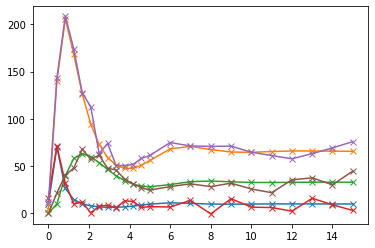

In [49]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pyabc

def f(y, t, p1, p2, p3, p4, p5):
    m, x1, x2 = y
    dm = x1*p2 - m*(p4+x2*p3)
    dx1 = m*p5 - x1*(p1+p4)
    dx2 = x1*p1 - x2*p4
    return dm, dx1, dx2

x0 = np.array([10, 5, 0])
ts = np.concatenate((np.linspace(0, 5, 12, endpoint=False), np.linspace(5, 15, 11)))

def model(p):
    sol = sp.integrate.odeint(
        f, x0, ts, args=(p['p1'], p['p2'], p['p3'], p['p4'], p['p5'])
    )
    return sol

p_true = {'p1': 0.5, 'p2': 10, 'p3': 2, 'p4': 1, 'p5': 10}
y = model(p_true)
plt.plot(ts, y, 'x-')

data = y + 7 * np.random.randn(23, 3)
plt.plot(ts, data, 'x-')

In [48]:
import numpy as np
import scipy as sp
import sdeint
import matplotlib.pyplot as plt
import pyabc
import sdepy

x0 = np.array([10, 5, 0])

@sdepy.integrate
def f(t, x, theta=1., k=1., sigma=1.):
    return {'dt': k*(theta - x), 'dw': sigma}

#@sdepy.integrate
#def f(t, x, p1=0.5, p2=10, p3=2, p4=1, p5=10):
#    m, x1, x2 = y
#    dm = x1*p2 - m*(p4+x2*p3)
#    dx1 = m*p5 - x1*(p1+p4)
#    dx2 = x1*p1 - x2*p4
#    return {'dm': dm, 'dx1': dx1, 'dx2': dx2}

ts = np.linspace(0, 3, 200)#concatenate((np.linspace(0, 5, 12, endpoint=False), np.linspace(5, 15, 11)))
f2 = sdepy.kfunc(f)


#print(issubclass(f, sdepy.integrator))
#p_true = {'p1': 0.5, 'p2': 10, 'p3': 2, 'p4': 1, 'p5': 10}
#y = model(p_true)
#plt.plot(ts, y[:], 'x-')

In [54]:
import numpy as np
import scipy as sp
import sdeint
import matplotlib.pyplot as plt
import pyabc

x0 = np.array([10, 5, 0])

def f(x, t, p1=0.5, p2=10, p3=2, p4=1, p5=10):
    m, x1, x2 = x
    dm = x1*p2 - m*(p4+x2*p3)
    dx1 = m*p5 - x1*(p1+p4)
    dx2 = x1*p1 - x2*p4
    return np.array([dm, dx1, dx2])

ts = np.linspace(0, 3, 200)#concatenate((np.linspace(0, 5, 12, endpoint=False), np.linspace(5, 15, 11)))
p_true = {'p1': 0.5, 'p2': 10, 'p3': 2, 'p4': 1, 'p5': 10}

f0 = lambda x, t: f(x, t, **p_true)
G = lambda x, t: np.eye(3)

sdeint.itoint(f0, G, x0, ts)

/home/yannik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/yannik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in long_scalars
  if sys.path[0] == '':


array([[                  10,                    5,                    0],
       [                  10,                    6,                    0],
       [                  10,                    7,                    0],
       [                  10,                    8,                    0],
       [                  11,                    9,                    0],
       [                  12,                   10,                    0],
       [                  13,                   11,                    0],
       [                  14,                   12,                    0],
       [                  15,                   13,                    0],
       [                  16,                   15,                    0],
       [                  18,                   17,                    0],
       [                  20,                   19,                    0],
       [                  22,                   21,                    0],
       [                 